In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [33]:
data = pd.DataFrame(pd.read_csv('CreditCard_GENERAL.csv'))
# print(data)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [26]:
# data cleaning
# checking for null values

# print(data.isnull().sum())

# replacing missing values w 0
data.fillna(0, inplace=True)
print(data.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [24]:
# checking for infinite values
print(data[data == float('inf')].count())
print(data[data == float('-inf')].count())
# there's no infinite values

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0

In [27]:
# extracting numeric data
x = data.select_dtypes(include=['float64', 'int64'])
# print(x)

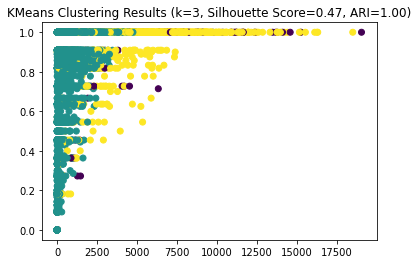

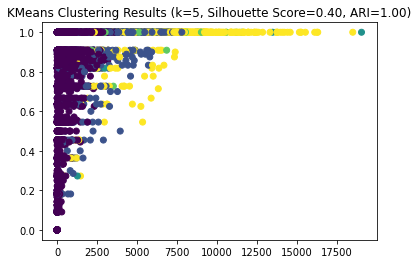

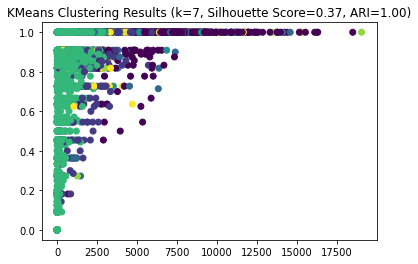

In [34]:
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(x, cluster_labels)
    
    # labelling the clusters
    cluster_names = [f'Cluster {i+1}' for i in range(k)]
    named_cluster_labels = [cluster_names[label] for label in cluster_labels]
    
    ari = adjusted_rand_score(named_cluster_labels, cluster_labels)
    
    # Visualize the results using a scatter plot
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=cluster_labels)
    plt.title(f'KMeans Clustering Results (k={k}, Silhouette Score={silhouette_avg:.2f}, ARI={ari:.2f})')
    plt.show()